#Student Name: Lin Gan<br>
#ECE 595 Machine Learning II<br>
#Project 1: CLDNN - Student Code

In [ ]:
#Import necessary packages
from math import log
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import _pickle as cPickle

#Part 0: Importing and normalizing data

In [ ]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10) 
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

#Part 1: Plotting cross entropy

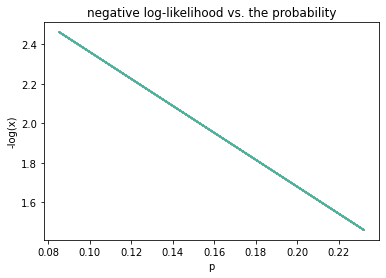

In [ ]:
#Show cross-entropy loss function
p = []
for i in labels_train:
    ex = np.exp(i) / np.sum(np.exp(i), axis=0)
    p.append(ex)
        
nll = [[-log(j) for j in i] for i in p]

plt.plot(p, nll)
plt.title("negative log-likelihood vs. the probability")
plt.xlabel("p")
plt.ylabel("-log(x)")
plt.show()

Answer the following questions:


1.   How is the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: <strong>When the value of p increases, the log-likelihood gets smaller; when p is small, the negtive-likelihood is large.</strong> <br><br>

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: <strong>The negtive log-likelihood function is numerically stable and easy to deal with multiplication or sum especially when the output is an array of probability with classes. Since the log function is a monotone transformation, it is helpful with estimation and optimization. When we want to minimize the cost or loss, NLL is able to handle it properly rather than maximum log-likelihood.</strong> 




#Part 2: Overfit CNN

In [ ]:
#Create and train model architecture
n=28
num_channels=1

def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    model.add(keras.layers.InputLayer(input_shape = (28,28,1))) #input layer
    
    model.add (Conv2D(256,
                     (3,3),                  #first hidden layer: 256 feature maps 3x3 filter
                     activation = 'relu',
                     input_shape =(n, n, num_channels)))
    
    model.add(MaxPooling2D(pool_size=(2,2), #second hiddenlayer : add a 2x2 maxpooling layer
                           strides=None,
                           padding='valid',
                           data_format=None))
    
    model.add (Conv2D(128,
                     (3,3),                  #third hidden layer: 128 feature maps 3x3 filter
                     activation = 'relu',
                     input_shape =(n, n, num_channels)))
    
    model.add(MaxPooling2D(pool_size=(2,2), #fourth hiddenlayer : add a 2x2 maxpooling layer
                           strides=None,
                           padding='valid',
                           data_format=None))
    
    model.add(Flatten( ))                  #fifth hidden layer: flatten data into dense layer
    
    model.add(Dense(100,                   #sixth hidden layer: add dense layer with 100 perceptron
             activation="relu",
             kernel_initializer="normal"))
    
    model.add(Dense(100,                   #seventh hidden layer: add dense layer with 100 perceptron
             activation="relu",
             kernel_initializer="normal"))
    
    model.add(Dense(10,              #output layer: 10 perceptrons
                 activation="softmax"))
                        

    return model

#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
CNN_overfit.compile(loss='mean_squared_error',
                     optimizer='RMSprop',
                     metrics =['accuracy'])

#Train the model and assign training meta-data to a variable
cnn_model_mdata = CNN_overfit.fit(data_train,labels_train,
                                 validation_data = (data_test,labels_test),
                                 epochs=200,
                                 batch_size = 1024,
                                 shuffle=True)

scores =  CNN_overfit.evaluate(data_test,labels_test)
#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores[1]*100))


Epoch 1/200
59/59 [==============================] - 13s 215ms/step - loss: 0.0530 - accuracy: 0.5760 - val_loss: 0.0334 - val_accuracy: 0.7547
Epoch 2/200
59/59 [==============================] - 12s 211ms/step - loss: 0.0304 - accuracy: 0.7789 - val_loss: 0.0298 - val_accuracy: 0.7846
Epoch 3/200
59/59 [==============================] - 12s 211ms/step - loss: 0.0246 - accuracy: 0.8257 - val_loss: 0.0220 - val_accuracy: 0.8450
Epoch 4/200
59/59 [==============================] - 12s 211ms/step - loss: 0.0210 - accuracy: 0.8526 - val_loss: 0.0221 - val_accuracy: 0.8466
Epoch 5/200
59/59 [==============================] - 12s 210ms/step - loss: 0.0190 - accuracy: 0.8675 - val_loss: 0.0192 - val_accuracy: 0.8646
Epoch 6/200
59/59 [==============================] - 12s 211ms/step - loss: 0.0172 - accuracy: 0.8809 - val_loss: 0.0191 - val_accuracy: 0.8632
Epoch 7/200
59/59 [==============================] - 12s 211ms/step - loss: 0.0161 - accuracy: 0.8880 - val_loss: 0.0180 - val_accuracy:

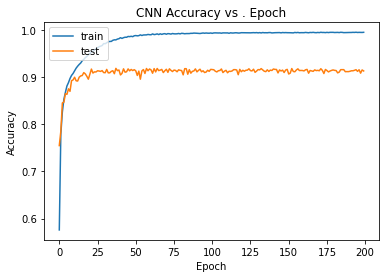

In [ ]:
#Plot accuracy vs epoch
plt.plot(cnn_model_mdata.history['accuracy'])
plt.plot(cnn_model_mdata.history['val_accuracy'])
plt.title('CNN Accuracy vs . Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

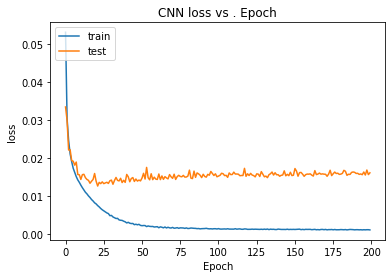

In [ ]:
#Plot loss vs epoch
plt.plot(cnn_model_mdata.history['loss'])
plt.plot(cnn_model_mdata.history['val_loss'])
plt.title('CNN loss vs . Epoch')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: <strong>Loss of the training set represents the error in the optimization process. The lower the loss, the better the model. It's calculated on training and validation that will give us a feedback of the performance. By the way, the loss helo us to find the best parameter that will improve the model.</strong>

2.   What does the loss of the testing set go to? 

  ANS: <strong>The loss of testing set indicated how well the dataset will fit the model. Through each iteration, the loss might not vary a lot due to the stability of the model.</strong>
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: <strong> The testing loss is always greater than the training loss in the model. The reasons might be bias that leads to underfitting or the traing set does not have enough samples to have a representative model. In our model, the testing set fits the models relatively well.</strong>

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: <strong> The problem is overfitting for the two training dataset. To avoid overfitting, we could add regularization parameters such as dropout, L1&L2, or collect more sample data to prevent over interpreting the model.</strong>

#Part 3: Dropout on input layer

In [ ]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    model.add(keras.layers.InputLayer(input_shape = (28,28,1))) #input layer

    model.add(Dropout(0.3))                  #Add an dropout of 30% to prevent overfitting
    
    model.add (Conv2D(256,
                     (3,3),                  #first hidden layer: 256 feature maps 3x3 filter
                     activation = 'relu',
                     input_shape =(n, n, num_channels)))
    
    model.add(MaxPooling2D(pool_size=(2,2), #second hiddenlayer : add a 2x2 maxpooling layer
                           strides=None,
                           padding='valid',
                           data_format=None))
    
    model.add (Conv2D(128,
                     (3,3),                  #third hidden layer: 128 feature maps 3x3 filter
                     activation = 'relu',
                     input_shape =(n, n, num_channels)))
    
    model.add(MaxPooling2D(pool_size=(2,2), #fourth hiddenlayer : add a 2x2 maxpooling layer
                           strides=None,
                           padding='valid',
                           data_format=None))
    
    model.add(Flatten( ))                  #fifth hidden layer: flatten data into dense layer
    
    model.add(Dense(100,                   #sixth hidden layer: add dense layer with 100 perceptron
             activation="relu",
             kernel_initializer="normal"))
    
    model.add(Dense(100,                   #seventh hidden layer: add dense layer with 100 perceptron
             activation="relu",
             kernel_initializer="normal"))
    
    model.add(Dense(10,              #output layer: 10 perceptrons
                 activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_in.compile(loss='mean_squared_error',
                     optimizer='RMSprop',
                     metrics =['accuracy'])

#Train the model and assign training meta-data to a variable
cnn_model_mdata = CNN_dropout_in.fit(data_train,labels_train,
                                 validation_data = (data_test,labels_test),
                                 epochs=200,
                                 batch_size = 1024,
                                 shuffle=True)

scores =  CNN_dropout_in.evaluate(data_test,labels_test)
#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 13s 215ms/step - loss: 0.0572 - accuracy: 0.5528 - val_loss: 0.0401 - val_accuracy: 0.7125
Epoch 2/200
59/59 [==============================] - 13s 212ms/step - loss: 0.0332 - accuracy: 0.7556 - val_loss: 0.0304 - val_accuracy: 0.7817
Epoch 3/200
59/59 [==============================] - 12s 211ms/step - loss: 0.0280 - accuracy: 0.7983 - val_loss: 0.0272 - val_accuracy: 0.8184
Epoch 4/200
59/59 [==============================] - 12s 211ms/step - loss: 0.0248 - accuracy: 0.8260 - val_loss: 0.0245 - val_accuracy: 0.8278
Epoch 5/200
59/59 [==============================] - 12s 211ms/step - loss: 0.0230 - accuracy: 0.8367 - val_loss: 0.0247 - val_accuracy: 0.8343
Epoch 6/200
59/59 [==============================] - 12s 211ms/step - loss: 0.0215 - accuracy: 0.8500 - val_loss: 0.0223 - val_accuracy: 0.8526
Epoch 7/200
59/59 [==============================] - 12s 210ms/step - loss: 0.0205 - accuracy: 0.8568 - val_loss: 0.0210 - val_accuracy:

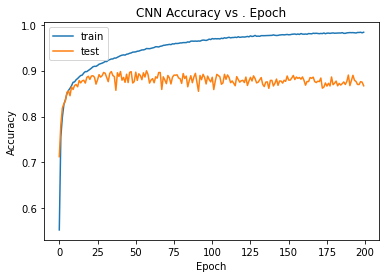

In [ ]:
#Plot accuracy vs epoch
plt.plot(cnn_model_mdata.history['accuracy'])
plt.plot(cnn_model_mdata.history['val_accuracy'])
plt.title('CNN Accuracy vs . Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

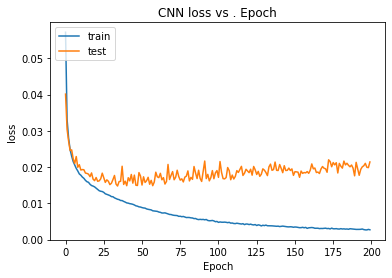

In [ ]:
#Plot loss vs epoch
plt.plot(cnn_model_mdata.history['loss'])
plt.plot(cnn_model_mdata.history['val_loss'])
plt.title('CNN loss vs . Epoch')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: <strong>The training dataset also lost data when adding dropout to the input layer. Dropping random data does not improve the performance of the model, and the loss of training set increases during the process. </strong>
  
2.   What does the loss of the testing set go to? 

  ANS: <strong>Adding the dropout at the input layer causes the information to lost for the whole network. The testing dataset might lost important information at the input layer and the loss keeps increasing when the number of layers increases.</strong>


3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS:  <strong> Introducing dropout at input layer could avoid overffiting, but it also causes problems. The testing dataset changes much may because of the injection of eariler noise. </strong>

#Part 4-I: Dropout on Hidden Layers

In [ ]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    model.add(keras.layers.InputLayer(input_shape = (28,28,1))) #input layer
    
    model.add (Conv2D(256,
                     (3,3),                  #first hidden layer: 256 feature maps 3x3 filter
                     activation = 'relu',
                     input_shape =(n, n, num_channels)))
    model.add(Dropout(0.3))                  #Add an dropout of 30% to prevent overfitting
    
    model.add(MaxPooling2D(pool_size=(2,2), #second hiddenlayer : add a 2x2 maxpooling layer
                           strides=None,
                           padding='valid',
                           data_format=None))
    
    model.add (Conv2D(128,
                     (3,3),                  #third hidden layer: 128 feature maps 3x3 filter
                     activation = 'relu',
                     input_shape =(n, n, num_channels)))
    model.add(Dropout(0.3))                  #Add an dropout of 30% to prevent overfitting
    
    model.add(MaxPooling2D(pool_size=(2,2), #fourth hiddenlayer : add a 2x2 maxpooling layer
                           strides=None,
                           padding='valid',
                           data_format=None))
    
    model.add(Flatten( ))                  #fifth hidden layer: flatten data into dense layer
    
    model.add(Dense(100,                   #sixth hidden layer: add dense layer with 100 perceptron
             activation="relu",
             kernel_initializer="normal"))
    
    model.add(Dense(100,                   #seventh hidden layer: add dense layer with 100 perceptron
             activation="relu",
             kernel_initializer="normal"))
    
    model.add(Dense(10,              #output layer: 10 perceptrons
                 activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_hidden.compile(loss='mean_squared_error',
                     optimizer='RMSprop',
                     metrics =['accuracy'])

#Train the model and assign training meta-data to a variable
cnn_model_mdata = CNN_dropout_hidden.fit(data_train,labels_train,
                                 validation_data = (data_test,labels_test),
                                 epochs=200,
                                 batch_size = 1024,
                                 shuffle=True)

scores =  CNN_dropout_hidden.evaluate(data_test,labels_test)
#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 18s 286ms/step - loss: 0.0507 - accuracy: 0.6079 - val_loss: 0.0372 - val_accuracy: 0.7396
Epoch 2/200
59/59 [==============================] - 17s 282ms/step - loss: 0.0287 - accuracy: 0.7942 - val_loss: 0.0300 - val_accuracy: 0.8043
Epoch 3/200
59/59 [==============================] - 17s 282ms/step - loss: 0.0232 - accuracy: 0.8383 - val_loss: 0.0257 - val_accuracy: 0.8336
Epoch 4/200
59/59 [==============================] - 17s 283ms/step - loss: 0.0202 - accuracy: 0.8587 - val_loss: 0.0221 - val_accuracy: 0.8622
Epoch 5/200
59/59 [==============================] - 17s 282ms/step - loss: 0.0184 - accuracy: 0.8729 - val_loss: 0.0254 - val_accuracy: 0.8275
Epoch 6/200
59/59 [==============================] - 17s 282ms/step - loss: 0.0173 - accuracy: 0.8804 - val_loss: 0.0202 - val_accuracy: 0.8645
Epoch 7/200
59/59 [==============================] - 17s 282ms/step - loss: 0.0160 - accuracy: 0.8893 - val_loss: 0.0184 - val_accuracy:

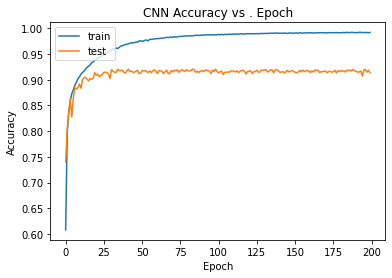

In [ ]:
#Plot accuracy vs epoch
plt.plot(cnn_model_mdata.history['accuracy'])
plt.plot(cnn_model_mdata.history['val_accuracy'])
plt.title('CNN Accuracy vs . Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

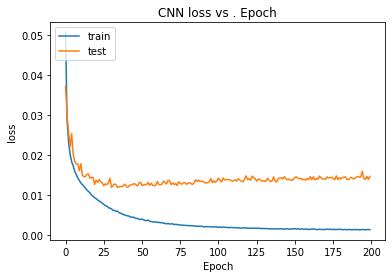

In [ ]:
#Plot loss vs epoch
plt.plot(cnn_model_mdata.history['loss'])
plt.plot(cnn_model_mdata.history['val_loss'])
plt.title('CNN loss vs . Epoch')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: <strong>The loss of the training set consist of the loss of randam data from the dropout at hidden layers, and the optimization process of the complex system since it stores a bunch of data. </strong>
  
2.   What does the loss of the testing set go to? 

  ANS: <strong>The loss of testing set consist of the errors calculating from the training model and the regularization process. When adding dropout at the conventional layers, the testing set also lost data even though the dropout improves overfitting.</strong>

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: <strong>The dropout at hidden layer makes the activation sparse, which is a good feature for optimization. Addtionally, the dropout regularization prevents overffiting when applying it on conventional layers, improving the performance of the neural network. As the figure showns above, the testing set has been regularized compare to the previous part.</strong>
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: <strong>The figure indicates that the testing set has been regularized and the accuracy increases compare to the previous architecture. The accuracy of the training set is close to 1 after the training. While the model is improved, we could not say that the testing set fits the training model perfectly. There are some errors between the model and the testing set. However, we could say that it is a fairly good model from the unbiased testing set.</strong>

#Part 4-II [Sub-Question 5]: Dropout on Input and Hidden Layers

In [ ]:
#Create and train model architecture
n=28
num_channels=1
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(keras.layers.InputLayer(input_shape = (28,28,1))) #input layer
    model.add(Dropout(0.3))                  #Add an dropout of 30% to prevent overfitting
    
    model.add (Conv2D(256,
                     (3,3),                  #first hidden layer: 256 feature maps 3x3 filter
                     activation = 'relu',
                     input_shape =(n, n, num_channels)))
    model.add(Dropout(0.3))                  #Add an dropout of 30% to prevent overfitting
    
    model.add(MaxPooling2D(pool_size=(2,2), #second hiddenlayer : add a 2x2 maxpooling layer
                           strides=None,
                           padding='valid',
                           data_format=None))
    
    model.add (Conv2D(128,
                     (3,3),                  #third hidden layer: 128 feature maps 3x3 filter
                     activation = 'relu',
                     input_shape =(n, n, num_channels)))
    model.add(Dropout(0.3))                  #Add an dropout of 30% to prevent overfitting
    
    model.add(MaxPooling2D(pool_size=(2,2), #fourth hiddenlayer : add a 2x2 maxpooling layer
                           strides=None,
                           padding='valid',
                           data_format=None))
    
    model.add(Flatten( ))                  #fifth hidden layer: flatten data into dense layer
    
    model.add(Dense(100,                   #sixth hidden layer: add dense layer with 100 perceptron
             activation="relu",
             kernel_initializer="normal"))
    
    model.add(Dense(100,                   #seventh hidden layer: add dense layer with 100 perceptron
             activation="relu",
             kernel_initializer="normal"))
    
    model.add(Dense(10,              #output layer: 10 perceptrons
                 activation="softmax"))
    
    return model


#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both.compile(loss='mean_squared_error',
                     optimizer='RMSprop',
                     metrics =['accuracy'])

#Train the model and assign training meta-data to a variable
cnn_model_mdata = CNN_dropout_both.fit(data_train,labels_train,
                                 validation_data = (data_test,labels_test),
                                 epochs=200,
                                 batch_size = 1024,
                                 shuffle=True)

scores =  CNN_dropout_both.evaluate(data_test,labels_test)
#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 30s 167ms/step - loss: 0.0573 - accuracy: 0.5428 - val_loss: 0.0572 - val_accuracy: 0.6257
Epoch 2/200
59/59 [==============================] - 8s 137ms/step - loss: 0.0331 - accuracy: 0.7562 - val_loss: 0.0413 - val_accuracy: 0.7790
Epoch 3/200
59/59 [==============================] - 8s 138ms/step - loss: 0.0282 - accuracy: 0.7962 - val_loss: 0.0347 - val_accuracy: 0.8152
Epoch 4/200
59/59 [==============================] - 8s 138ms/step - loss: 0.0253 - accuracy: 0.8218 - val_loss: 0.0298 - val_accuracy: 0.8273
Epoch 5/200
59/59 [==============================] - 8s 138ms/step - loss: 0.0233 - accuracy: 0.8361 - val_loss: 0.0302 - val_accuracy: 0.8413
Epoch 6/200
59/59 [==============================] - 8s 138ms/step - loss: 0.0217 - accuracy: 0.8464 - val_loss: 0.0264 - val_accuracy: 0.8342
Epoch 7/200
59/59 [==============================] - 8s 138ms/step - loss: 0.0208 - accuracy: 0.8533 - val_loss: 0.0255 - val_accuracy: 0.855

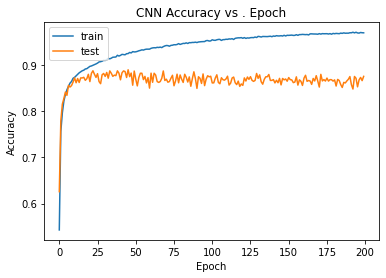

In [ ]:
#Plot accuracy vs epoch
plt.plot(cnn_model_mdata.history['accuracy'])
plt.plot(cnn_model_mdata.history['val_accuracy'])
plt.title('CNN Accuracy vs . Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

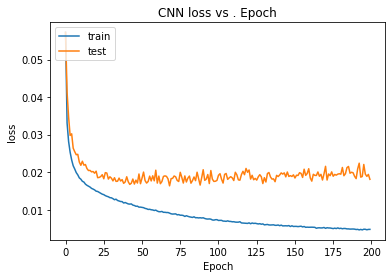

In [ ]:
#Plot loss vs epoch
plt.plot(cnn_model_mdata.history['loss'])
plt.plot(cnn_model_mdata.history['val_loss'])
plt.title('CNN loss vs . Epoch')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: <strong>The loss of the training set consist of the errors when training the model, as well as the loss of dropout at each layer.</strong>
  
2.   What does the loss of the testing set go to? 

  ANS: <strong>The testing set lost data when calculating the error between the unbiased set and the training model. Additionally, it lost data when dropout applies to the input layer and hidde layers.</strong>
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: <strong>The accuracy of the training set increases during the training, and is close to 1 at the end. The accuracy of the testing set is around 0.9 after the training, which is relatively low compare to the previous architecture.</strong>

4.   Compare results in 4 with results in 5. Comment on robustness and accuracy.

  ANS: <strong>In general, dropout will make the model robust and accurate. However, in this model, the dropout does not reduce overfitting. The best way to imporve the model is to add dropout at fully connected hidden layers, which is conventional layer or dense layer, since they have a great number of parameters. It is not wrong to add dropout at input layers, but it is not recommended. </strong>

#Part 5 : Activation Functions

In [ ]:
#Create and train model architecture
def CNN_dropout_both_act():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(keras.layers.InputLayer(input_shape = (28,28,1))) #input layer
    
    model.add (Conv2D(256,
                     (3,3),                  #first hidden layer: 256 feature maps 3x3 filter
                     activation = 'relu',
                     input_shape =(n, n, num_channels)))
    model.add(Dropout(0.3))                  #Add an dropout of 30% to prevent overfitting
    
    model.add(MaxPooling2D(pool_size=(2,2), #second hiddenlayer : add a 2x2 maxpooling layer
                           strides=None,
                           padding='valid',
                           data_format=None))
    
    model.add (Conv2D(128,
                     (3,3),                  #third hidden layer: 128 feature maps 3x3 filter
                     activation = 'relu',
                     input_shape =(n, n, num_channels)))
    model.add(Dropout(0.3))                  #Add an dropout of 30% to prevent overfitting
    
    model.add(MaxPooling2D(pool_size=(2,2), #fourth hiddenlayer : add a 2x2 maxpooling layer
                           strides=None,
                           padding='valid',
                           data_format=None))
    
    model.add(Flatten( ))                  #fifth hidden layer: flatten data into dense layer
    
    model.add(Dense(100,                   #sixth hidden layer: add dense layer with 100 perceptron
             activation="relu",
             kernel_initializer="normal"))
    
    model.add(Dense(100,                   #seventh hidden layer: add dense layer with 100 perceptron
             activation="relu",
             kernel_initializer="normal"))
    
    model.add(Dense(10,              #output layer: 10 perceptrons with sigmoid
                 activation="sigmoid"))
    
    return model


#Create instance of CNN model graph
CNN_dropout_both_act = CNN_dropout_both_act()

CNN_dropout_both_act.compile(loss='mean_squared_error',
                     optimizer='RMSprop',
                     metrics =['accuracy'])

#Train the model and assign training meta-data to a variable
cnn_model_mdata = CNN_dropout_both_act.fit(data_train,labels_train,
                                 validation_data = (data_test,labels_test),
                                 epochs=200,
                                 batch_size = 1024,
                                 shuffle=True)

scores =  CNN_dropout_both_act.evaluate(data_test,labels_test)
#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 9s 142ms/step - loss: 0.0741 - accuracy: 0.4601 - val_loss: 0.0514 - val_accuracy: 0.6868
Epoch 2/200
59/59 [==============================] - 8s 140ms/step - loss: 0.0367 - accuracy: 0.7408 - val_loss: 0.0367 - val_accuracy: 0.7755
Epoch 3/200
59/59 [==============================] - 8s 141ms/step - loss: 0.0289 - accuracy: 0.7995 - val_loss: 0.0331 - val_accuracy: 0.7866
Epoch 4/200
59/59 [==============================] - 8s 141ms/step - loss: 0.0247 - accuracy: 0.8292 - val_loss: 0.0334 - val_accuracy: 0.7901
Epoch 5/200
59/59 [==============================] - 8s 142ms/step - loss: 0.0217 - accuracy: 0.8504 - val_loss: 0.0242 - val_accuracy: 0.8448
Epoch 6/200
59/59 [==============================] - 8s 141ms/step - loss: 0.0198 - accuracy: 0.8641 - val_loss: 0.0225 - val_accuracy: 0.8580
Epoch 7/200
59/59 [==============================] - 8s 140ms/step - loss: 0.0183 - accuracy: 0.8738 - val_loss: 0.0209 - val_accuracy: 0.8741

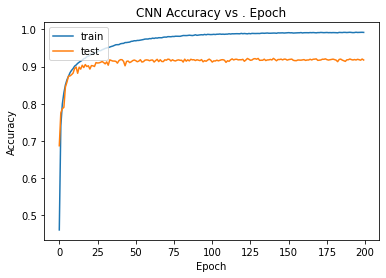

In [ ]:
#Plot accuracy vs epoch
plt.plot(cnn_model_mdata.history['accuracy'])
plt.plot(cnn_model_mdata.history['val_accuracy'])
plt.title('CNN Accuracy vs . Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

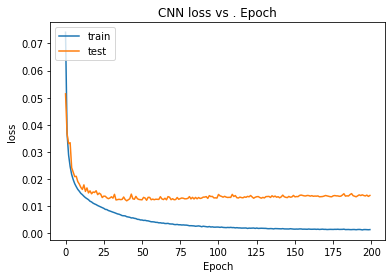

In [ ]:
#Plot loss vs epoch
plt.plot(cnn_model_mdata.history['loss'])
plt.plot(cnn_model_mdata.history['val_loss'])
plt.title('CNN loss vs . Epoch')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

In [ ]:
def CNN_dropout_both_act_tanh():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(keras.layers.InputLayer(input_shape = (28,28,1))) #input layer
    
    model.add (Conv2D(256,
                     (3,3),                  #first hidden layer: 256 feature maps 3x3 filter
                     activation = 'relu',
                     input_shape =(n, n, num_channels)))
    model.add(Dropout(0.3))                  #Add an dropout of 30% to prevent overfitting
    
    model.add(MaxPooling2D(pool_size=(2,2), #second hiddenlayer : add a 2x2 maxpooling layer
                           strides=None,
                           padding='valid',
                           data_format=None))
    
    model.add (Conv2D(128,
                     (3,3),                  #third hidden layer: 128 feature maps 3x3 filter
                     activation = 'relu',
                     input_shape =(n, n, num_channels)))
    model.add(Dropout(0.3))                  #Add an dropout of 30% to prevent overfitting
    
    model.add(MaxPooling2D(pool_size=(2,2), #fourth hiddenlayer : add a 2x2 maxpooling layer
                           strides=None,
                           padding='valid',
                           data_format=None))
    
    model.add(Flatten( ))                  #fifth hidden layer: flatten data into dense layer
    
    model.add(Dense(100,                   #sixth hidden layer: add dense layer with 100 perceptron
             activation="relu",
             kernel_initializer="normal"))
    
    model.add(Dense(100,                   #seventh hidden layer: add dense layer with 100 perceptron
             activation="relu",
             kernel_initializer="normal"))
    
    model.add(Dense(10,              #output layer: 10 perceptrons with tanh
                 activation="tanh"))
    
    return model


#Create instance of CNN model graph
CNN_dropout_both_act_tanh = CNN_dropout_both_act_tanh()

CNN_dropout_both_act_tanh.compile(loss='mean_squared_error',
                     optimizer='RMSprop',
                     metrics =['accuracy'])

#Train the model and assign training meta-data to a variable
cnn_model_mdata = CNN_dropout_both_act_tanh.fit(data_train,labels_train,
                                 validation_data = (data_test,labels_test),
                                 epochs=200,
                                 batch_size = 1024,
                                 shuffle=True)

scores =  CNN_dropout_both_act_tanh.evaluate(data_test,labels_test)
#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 9s 142ms/step - loss: 0.0631 - accuracy: 0.5971 - val_loss: 0.0425 - val_accuracy: 0.7683
Epoch 2/200
59/59 [==============================] - 8s 140ms/step - loss: 0.0316 - accuracy: 0.8001 - val_loss: 0.0328 - val_accuracy: 0.8049
Epoch 3/200
59/59 [==============================] - 8s 140ms/step - loss: 0.0243 - accuracy: 0.8483 - val_loss: 0.0261 - val_accuracy: 0.8535
Epoch 4/200
59/59 [==============================] - 8s 140ms/step - loss: 0.0205 - accuracy: 0.8701 - val_loss: 0.0242 - val_accuracy: 0.8546
Epoch 5/200
59/59 [==============================] - 8s 140ms/step - loss: 0.0183 - accuracy: 0.8827 - val_loss: 0.0214 - val_accuracy: 0.8728
Epoch 6/200
59/59 [==============================] - 8s 140ms/step - loss: 0.0169 - accuracy: 0.8916 - val_loss: 0.0200 - val_accuracy: 0.8865
Epoch 7/200
59/59 [==============================] - 8s 140ms/step - loss: 0.0158 - accuracy: 0.8977 - val_loss: 0.0191 - val_accuracy: 0.8961

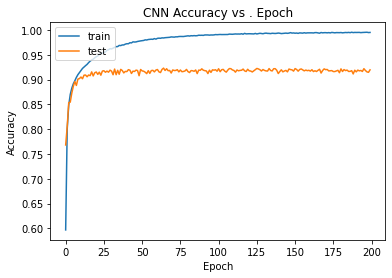

In [ ]:
plt.plot(cnn_model_mdata.history['accuracy'])
plt.plot(cnn_model_mdata.history['val_accuracy'])
plt.title('CNN Accuracy vs . Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

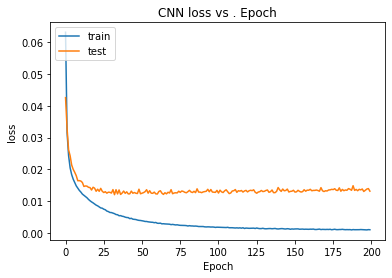

In [ ]:
plt.plot(cnn_model_mdata.history['loss'])
plt.plot(cnn_model_mdata.history['val_loss'])
plt.title('CNN loss vs . Epoch')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

Answer the following questions: 

1-c.   Compare the above results with softmax results (with point 5 results of Part 4-II)

  ANS: <strong>The accuracy of both sigmoid and tanh is greater than softmax. The regularization of sigmoid works well and it reduces overfitting. From the figure of tanh loss vs epoch, we could see that tanh does not fit the data well as the sigmoid activation. Overall, the performance of sigmoid is the best among the three activation functions.</strong>
  
2-a.   Does ‘tanh’ as output activation work with Cross-entropy loss?

  ANS: <strong>The tanh function could be used as the output activation if the value is in the range of [-1, 1]. It is working with cross-entropy loss.</strong>

2-b.   Give a reason why tanh is not recommended with cross entropy loss?

  ANS: <strong>We are dealing with classification when applying any activation functions, which needs soft probabilities (i.e. range in between[0,1]). Uasing tanh may not improve the performance of the image.</strong>

2-c.   Give a reason why sigmoid does not cause problem as tanh with Cross entropy loss?

  ANS: <strong>Sigmoid ensures that the output values are in between 0 and 1, which means we could easily see the probabilities. It is useful when we have categories that are not mutually exlusive. Moreover, sigmoid could help learn the relationship between some features and the binary features in machine learning.</strong> 


#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [ ]:
#Download RML 2016.10b dataset and untar file
!wget -O RML2016.10b.tar.bz2 https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210920022552_7d6848a43af1e3894dec8068_d5bec3f91e64b4ba406ea6fb5709e0f011456e66_002_20210920032552_0027_dnld
!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'), encoding="latin1")
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

--2021-09-20 03:09:46--  https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210920022552_7d6848a43af1e3894dec8068_d5bec3f91e64b4ba406ea6fb5709e0f011456e66_002_20210920032552_0027_dnld
Resolving f002.backblazeb2.com (f002.backblazeb2.com)... 206.190.215.16
Connecting to f002.backblazeb2.com (f002.backblazeb2.com)|206.190.215.16|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  59.0MB/s    in 21s     

2021-09-20 03:10:07 (57.1 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [ ]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    
    model.add(keras.layers.InputLayer(input_shape = (2,128,1))) #input layer
    model.add (Conv2D(256,
                     (1,3),                    #first hidden layer: 256 feature maps 1x3 filter
                     activation = 'relu',
                     input_shape =(2, 128, 1)))
    model.add(Dropout(0.2))                    #Add an dropout of 20% to prevent overfitting
    model.add (Conv2D(256,
                     (2,3),                    #second hidden layer: 256 feature maps 1x3 filter
                     activation = 'relu',
                     input_shape =(2, 128, 1)))
    model.add (Conv2D(80,
                     (1,3),                    #third hidden layer: 80 feature maps 1x3 filter
                     activation = 'relu',
                     input_shape =(2, 128, 1)))
    model.add(Dropout(0.2))                    #Add an dropout of 20% to prevent overfitting
    model.add (Conv2D(80,
                     (1,3),                    #third hidden layer: 80 feature maps 1x3 filter
                     activation = 'relu',
                     input_shape =(2, 128, 1)))
    
    model.add(keras.layers.Reshape((120,80))) #reshape the layer to 2 dimensional
    model.add(LSTM(50))                       #fifth hidden layer
    model.add(Dense(128,                       #sixth hidden layer: add dense layer with 128 perceptron
             activation="relu",
             kernel_initializer="normal"))
    model.add(Dense(10,                        #output layer: 10 perceptrons
                 activation="softmax"))

    return model

#Compile model using an appropriate loss and optimizer algorithm
cldnn = cldnn()

cldnn.compile(loss='mean_squared_error',
                     optimizer='RMSprop',
                     metrics =['accuracy'])

#Train the model and assign training meta-data to a variable
cnn_model_mdata = cldnn.fit(X_train,Y_train,
                                 validation_data = (X_test,Y_test),
                                 epochs=15,
                                 batch_size = 1024,
                                 shuffle=True)

scores =  cldnn.evaluate(X_test,Y_test)
#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/15
422/422 [==============================] - 88s 199ms/step - loss: 0.0820 - accuracy: 0.2136 - val_loss: 0.0752 - val_accuracy: 0.3033
Epoch 2/15
422/422 [==============================] - 80s 189ms/step - loss: 0.0655 - accuracy: 0.4284 - val_loss: 0.0542 - val_accuracy: 0.5318
Epoch 3/15
422/422 [==============================] - 80s 189ms/step - loss: 0.0460 - accuracy: 0.6131 - val_loss: 0.0352 - val_accuracy: 0.7094
Epoch 4/15
422/422 [==============================] - 80s 189ms/step - loss: 0.0335 - accuracy: 0.7261 - val_loss: 0.0274 - val_accuracy: 0.7729
Epoch 5/15
422/422 [==============================] - 79s 188ms/step - loss: 0.0280 - accuracy: 0.7680 - val_loss: 0.0298 - val_accuracy: 0.7555
Epoch 6/15
422/422 [==============================] - 79s 188ms/step - loss: 0.0250 - accuracy: 0.7894 - val_loss: 0.0227 - val_accuracy: 0.8081
Epoch 7/15
422/422 [==============================] - 79s 188ms/step - loss: 0.0235 - accuracy: 0.8008 - val_loss: 0.0223 - val_ac

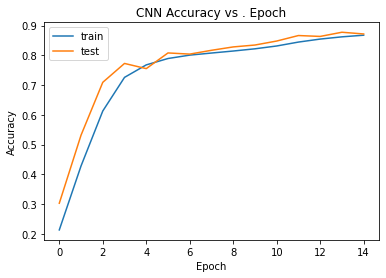

In [ ]:
#Plot accuracy vs epoch
plt.plot(cnn_model_mdata.history['accuracy'])
plt.plot(cnn_model_mdata.history['val_accuracy'])
plt.title('CNN Accuracy vs . Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

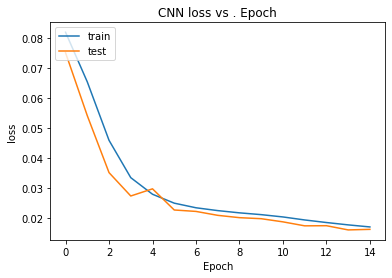

In [ ]:
#Plot loss vs epoch
plt.plot(cnn_model_mdata.history['loss'])
plt.plot(cnn_model_mdata.history['val_loss'])
plt.title('CNN loss vs . Epoch')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'] , loc= 'upper left')
plt.show()

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: <strong>From the accuracy and the loss figure, we could say that the model fits the data well. </strong>

2.   Give two ways to improve the robustness of the model.

  ANS: <strong>First, we could adjust the dropout values to prevent overfitting. We could increase the value to 0.4 or 0.5 to improve the regularization. Second, increasing the number of epoch makes the training model better. Third, preprocessing data augmentation that will increase the amout of data from the current data to prevent overfitting. </strong>